# SciPy introduction

The [SciPy framework](https://www.scipy.org) builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

## Regression analysis

In [2]:
from scipy import stats
import numpy as np

## Interpolation example (1D)

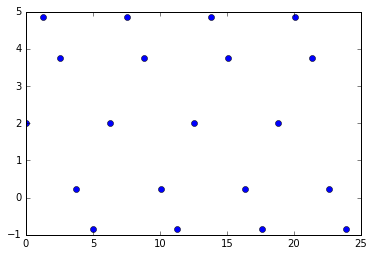

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import interpolate

k = 1
N = 20
t = 8.*np.pi*np.arange(N)/float(N)
y = 3. * np.sin(k*t) + 2.

f = plt.figure()
ax = f.add_subplot(111)
ax.plot(t,y, 'o')



In [22]:
# generate interpolation kernel
fu = interpolate.interp1d(t,y)


scipy.interpolate.interpolate.interp1d

In [26]:
x2 = np.arange(100)
y2 = fu(x2)

## Function fitting

If you know already a function form that you want to fit, but you don't know the parameters, the `optimize` package is the way to go.

This basically fits a given function to a dataset and determines the function parameters. *Fit* can hereby mean different things, but often a least square fit is used.

Most commonly you will start working with either of the two functions

* minimize
* curve_fit

### Some example


Let's say you want to fit a function of the form

$y = a \cdot \sin(kt) + c$

Then you have the parameters $a,k,c$.

To be able to determine the parameters we need to let the optimizer know how the function looks like. This is done by simply writing a function.




In [40]:
from scipy.optimize import minimize

def func(x,t,y):
    """
    function that returns results
    """
    a = x[0]
    k = x[1]
    c = x[2]
    
    return np.sum(((a*np.sin(k*t)+c) - y)**2.)  # here we define a cost function

x0=np.array([1.,1.,1.])
res = minimize(func, x0, method='Nelder-Mead', args=(t,y))
    
    
# a lot of parameters can be specified ...
    
    

In [43]:
# The same with the curve_fit function
from scipy.optimize import curve_fit

def func2(t, a, k, c):   # here we define the function directly
    return a*np.sin(k*t)+c
    
popt, pcov = curve_fit(func2, t, y)
